In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

100% 158M/158M [00:06<00:00, 25.0MB/s]
100% 158M/158M [00:06<00:00, 26.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callEarly=EarlyStopping(monitor='val_loss',patience=50,verbose=1,mode="auto")

In [ ]:
history = model.fit(train_ds, epochs=100, validation_data=validation_ds)

Epoch 1/100
8/8 [==============================] - 16s 414ms/step - loss: 3.2943 - accuracy: 0.6494 - val_loss: 1.4431 - val_accuracy: 0.3030
Epoch 2/100
8/8 [==============================] - 4s 174ms/step - loss: 0.8850 - accuracy: 0.8526 - val_loss: 0.9917 - val_accuracy: 0.4394
Epoch 3/100
8/8 [==============================] - 4s 173ms/step - loss: 0.5768 - accuracy: 0.9203 - val_loss: 1.8131 - val_accuracy: 0.3939
Epoch 4/100
8/8 [==============================] - 5s 177ms/step - loss: 0.3939 - accuracy: 0.9363 - val_loss: 4.2055 - val_accuracy: 0.3939
Epoch 5/100
8/8 [==============================] - 4s 171ms/step - loss: 0.3302 - accuracy: 0.9323 - val_loss: 13.5399 - val_accuracy: 0.3939
Epoch 6/100
8/8 [==============================] - 4s 178ms/step - loss: 0.1850 - accuracy: 0.9681 - val_loss: 16.8721 - val_accuracy: 0.3939
Epoch 7/100
8/8 [==============================] - 4s 177ms/step - loss: 0.1876 - accuracy: 0.9522 - val_loss: 18.7091 - val_accuracy: 0.3939
Epoch 8/1

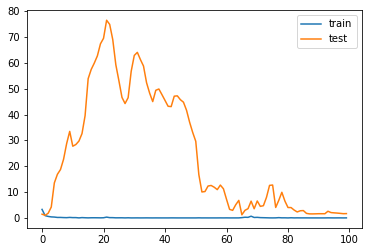

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

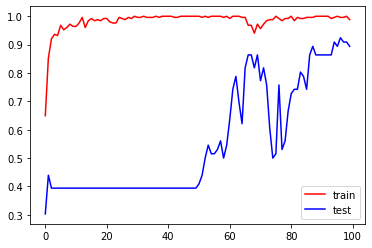

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show() 

In [ ]:
import cv2

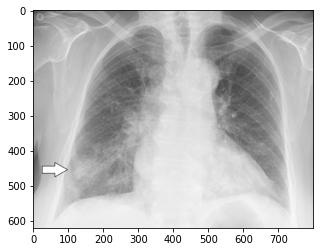

In [ ]:
test_img = cv2.imread('/content/p2.jpeg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(621, 800, 3)

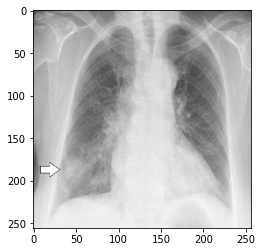

In [ ]:

test_img_scale=cv2.resize(test_img,(256,256))  #resizing the img to 256,256
plt.imshow(test_img_scale) 

In [ ]:
test_input=test_img_scale.reshape((1,256,256,3)) #reshaping the image
model.predict(test_input) 


1/1 [==============================] - 0s 22ms/step


array([[0., 1., 0.]], dtype=float32)